# Trust Bank's Red Flags # 
## Introduction ## 

This project will help in understanding about the trends and potential causes of the fraudulent transactions happening in the Trust Bank. For which we have provided with 590540 records and 137 features, from which we'll refine the data and conclude the potential reasons for the frauds. 

## Loading the data ##

In [137]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [139]:
bank_data = pd.read_csv('Trust_Bank_Data.csv')

bank_data.head()

,"<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv=""content-type"" content=""text/html; charset=utf-8""/><style nonce=""2TLAjB2iV0WU8qr5YX17sg"">.goog-inline-block{position:relative;display:-moz-inline-box;display:inline-block}* html .goog-inline-block{display:inline}*:first-child+html .goog-inline-block{display:inline}.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial",sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-error-caption,".uc-warning-caption{color:#222;font-size:16px}#uc-download-link{text-decoration:none}.uc-name-size a{color:#15c;text-decoration:none}.uc-name-size a:visited{color:#61c;text-decoration:none}.uc-name-size a:active{color:#d14836;text-decoration:none}.uc-footer{color:#777;font-size:11px;padding-bottom:5ex;padding-top:5ex;text-align:center}.uc-footer a{color:#15c}.uc-footer a:visited{color:#61c}.uc-footer a:active{color:#d14836}.uc-footer-divider{color:#ccc;width:100%}sentinel{}</style><link rel=""icon"" href=""//ssl.gstatic.com/docs/doclist/images/drive_2022q3_32dp.png""/></head><body><div class=""uc-main""><div id=""uc-dl-icon"" class=""image-container""><div class=""drive-sprite-aux-download-file""></div></div><div id=""uc-text""><p class=""uc-warning-caption"">Google Drive can't scan this file for viruses.</p><p class=""uc-warning-subcaption""><span class=""uc-name-size""><a href=""/open?id=1oYjS7dyJ8iqTZpkcJKyAE_TcOwi6iLL8"">Trust_Bank_data.csv</a> (218M)</span> is too large for Google to scan for viruses. Would you still like to download this file?</p><form id=""download-form"" action=""https://drive.google.com/uc?id=1oYjS7dyJ8iqTZpkcJKyAE_TcOwi6iLL8&amp;confirm=t&amp;uuid=2ced5b21-bc78-4f84-aba9-cd031319d6bd"" method=""post""><input type=""submit"" id=""uc-download-link"" class=""goog-inline-block jfk-button jfk-button-action"" value=""Download anyway""/></form></div></div><div class=""uc-footer""><hr class=""uc-footer-divider""></div></body></html>"


In [3]:
#data preview
bank_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Exploration ##

With initial data preview we can see that Bank has provided us 'isFraud' flag which will help us in identifying the data, hence let's consider this and plot this to check how many were Fraud and Non Fraud data present in this data set.

<Axes: xlabel='isFraud', ylabel='count'>

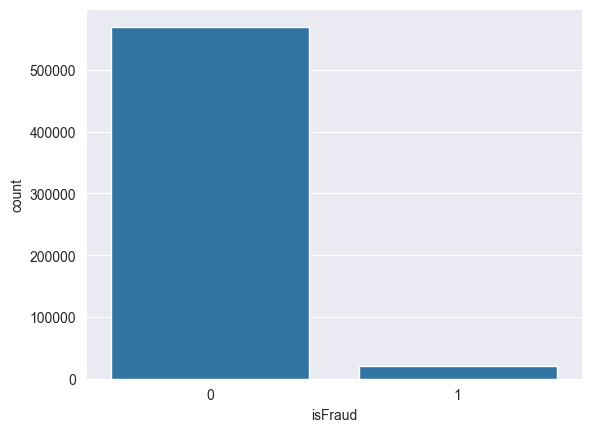

In [4]:
sns.countplot(data=bank_data, x='isFraud')

It can be seen that the quantity of Non Fraud Transaction is considerably dominant over fraud transaction, which is not satisfactory that actually the data is unbiased for non-fraud and fraud transaction.So firstly let's check the shape of the dataset.

In [5]:
#Shape of the dataset
bank_data.shape

(590540, 138)

There are 138 features & 590540 records present in this dataset. With these many records and features now we need to remove all irrelevant features and records.
Let's figure out features present in the dataset. 

In [6]:
#Finding columns of the dataframe
bank_data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=138)

There are many columns which are "card" data, lets explore and verify whether this data is useful or not. 

In [7]:
'''Let's normalise the card data types, as not all the card features are of same data type. We'll use one hot encoding to change categorical values to numerical values'''
#Using frequency encoding we'll encode card4 & card6 features.
#card4 encoding
bank_data['card4'] = bank_data['card4'].fillna('Missed_card') # Filling null values to sensible category so that we can create heatmap at later stage properly.
value_counts = bank_data['card4'].value_counts().to_dict()
print(value_counts)
bank_data['card4_new'] = bank_data['card4'].map(value_counts)
print(bank_data['card4_new'])

{'visa': 384767, 'mastercard': 189217, 'american express': 8328, 'discover': 6651, 'Missed_card': 1577}
0           6651
1         189217
2         384767
3         189217
4         189217
           ...  
590535    384767
590536    189217
590537    189217
590538    189217
590539    189217
Name: card4_new, Length: 590540, dtype: int64


In [8]:
#card6 encoding
bank_data['card6'] = bank_data['card6'].fillna('Missed_card') # Filling null values to sensible category so that we can create heatmap at later stage properly.
value_counts = bank_data['card6'].value_counts().to_dict()
print(value_counts)
bank_data['card6_new'] = bank_data['card6'].map(value_counts)
print(bank_data['card6_new'])

{'debit': 439938, 'credit': 148986, 'Missed_card': 1571, 'debit or credit': 30, 'charge card': 15}
0         148986
1         148986
2         439938
3         439938
4         148986
           ...  
590535    439938
590536    439938
590537    439938
590538    439938
590539    148986
Name: card6_new, Length: 590540, dtype: int64


In [9]:
#Dropping card4 and card6 so that all card features be of numerical data type.
card_drop_data = bank_data.drop(columns=['card4','card6'],inplace=True)
#Creating list of features starts with 'card'
card_features = bank_data.columns[bank_data.columns.str.startswith('card')]
print(card_features)

Index(['card1', 'card2', 'card3', 'card5', 'card4_new', 'card6_new'], dtype='object')


In [10]:
card_data = bank_data[np.concatenate([card_features,np.array(['isFraud'])])]
print(card_data)

        card1  card2  card3  card5  card4_new  card6_new  isFraud
0       13926    NaN  150.0  142.0       6651     148986        0
1        2755  404.0  150.0  102.0     189217     148986        0
2        4663  490.0  150.0  166.0     384767     439938        0
3       18132  567.0  150.0  117.0     189217     439938        0
4        4497  514.0  150.0  102.0     189217     148986        0
...       ...    ...    ...    ...        ...        ...      ...
590535   6550    NaN  150.0  226.0     384767     439938        0
590536  10444  225.0  150.0  224.0     189217     439938        0
590537  12037  595.0  150.0  224.0     189217     439938        0
590538   7826  481.0  150.0  224.0     189217     439938        0
590539  15066  170.0  150.0  102.0     189217     148986        0

[590540 rows x 7 columns]


Lets find the correlation of "card" features with isFraud flag to identify how much relevant this data is.

<Axes: >

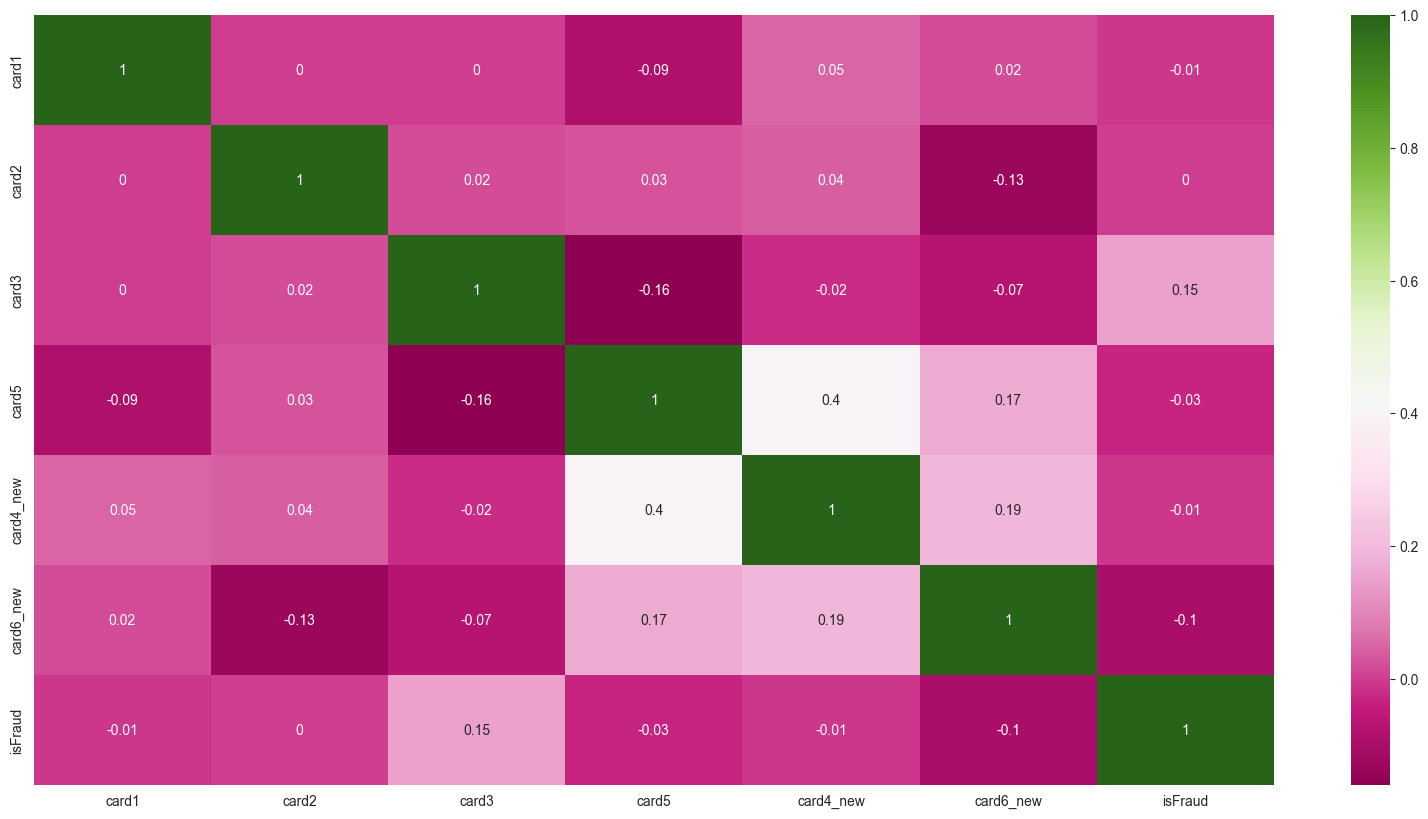

In [11]:
plt.rcParams['figure.figsize']= [20,10]
matrix = round(card_data.corr(),2)
sns.heatmap(matrix,annot=True, cmap='PiYG')

From above heatmap its very clear now that there is very remote relationship between cards and isFraud feature, so we'll remove these features from our dataset.

Now lets explore more features relationship with isFraud feature. Features to be explored: aadr1, addr2, dist1, dist2, P_emaidomain, R_emaildomain
Lets find the null values on these features

In [12]:
df_columns = ['addr1','addr2','dist1','dist2','P_emaildomain','R_emaildomain']
bank_data[df_columns].isna().sum()

addr1             65706
addr2             65706
dist1            352271
dist2            552913
P_emaildomain     94456
R_emaildomain    453249
dtype: int64

We can infer from above that these data consists of almost null values hence we wont be able to analyse the significane of these features in identifying fraudulent transaction. So we'll drop these features as well.

In [13]:
bank_data.drop(columns=df_columns)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card5,SK_ID_CURR,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,card4_new,card6_new
0,2987000,0,86400,68.50,W,13926,NaN,150.0,142.0,100002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6651,148986
1,2987001,0,86401,29.00,W,2755,404.0,150.0,102.0,100003.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189217,148986
2,2987002,0,86469,59.00,W,4663,490.0,150.0,166.0,100004.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,384767,439938
3,2987003,0,86499,50.00,W,18132,567.0,150.0,117.0,100006.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,189217,439938
4,2987004,0,86506,50.00,H,4497,514.0,150.0,102.0,100007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189217,148986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,226.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384767,439938
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,224.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189217,439938
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,224.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189217,439938
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,224.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189217,439938


Now we observed that there are many "flag" features which consists of binary values, hence we can plot heatmap against isFraud and find out whether these features are useful for investigating frauds.

In [14]:
#Encode Flag_OWN_CAR & FLAG_OWN_REALTY using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(bank_data['FLAG_OWN_CAR'])
le.fit(bank_data['FLAG_OWN_REALTY'])

bank_data['FLAG_LE_OWN_CAR'] = le.transform(bank_data['FLAG_OWN_CAR'])
bank_data['FLAG_LE_OWN_REALTY'] = le.transform(bank_data['FLAG_OWN_REALTY'])
bank_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card5,addr1,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,card4_new,card6_new,FLAG_LE_OWN_CAR,FLAG_LE_OWN_REALTY
0,2987000,0,86400,68.5,W,13926,NaN,150.0,142.0,315.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6651,148986,0,1
1,2987001,0,86401,29.0,W,2755,404.0,150.0,102.0,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,189217,148986,0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,166.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,384767,439938,1,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,117.0,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,189217,439938,0,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,102.0,420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,189217,148986,0,1


In [15]:
#Droppig categorical data FLAG_OWN_CAR & FLAG_OWN_REALTY

bank_data.drop(columns=['FLAG_OWN_CAR','FLAG_OWN_REALTY'],inplace=True)

In [16]:
bank_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card5,addr1,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,card4_new,card6_new,FLAG_LE_OWN_CAR,FLAG_LE_OWN_REALTY
0,2987000,0,86400,68.5,W,13926,NaN,150.0,142.0,315.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6651,148986,0,1
1,2987001,0,86401,29.0,W,2755,404.0,150.0,102.0,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,189217,148986,0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,166.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,384767,439938,1,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,117.0,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,189217,439938,0,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,102.0,420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,189217,148986,0,1


In [17]:
#Grouping flag features & creating flag subset
flag_features = bank_data.columns[bank_data.columns.str.startswith('FLAG')]
flag_df = bank_data[np.concatenate([flag_features,np.array(['isFraud'])])]
print(flag_features)
print(flag_df)

Index(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'FLAG_LE_OWN_CAR', 'FLAG_LE_OWN_REALTY'],
      dtype='object')
        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0              1.0             1.0              0.0               1.0   
1              1.0             1.0              0.0               1.0   
2              1.0             1.0              1.0               1.0   
3              1.0             1.0              0.0               1.0   
4              1.

<Axes: >

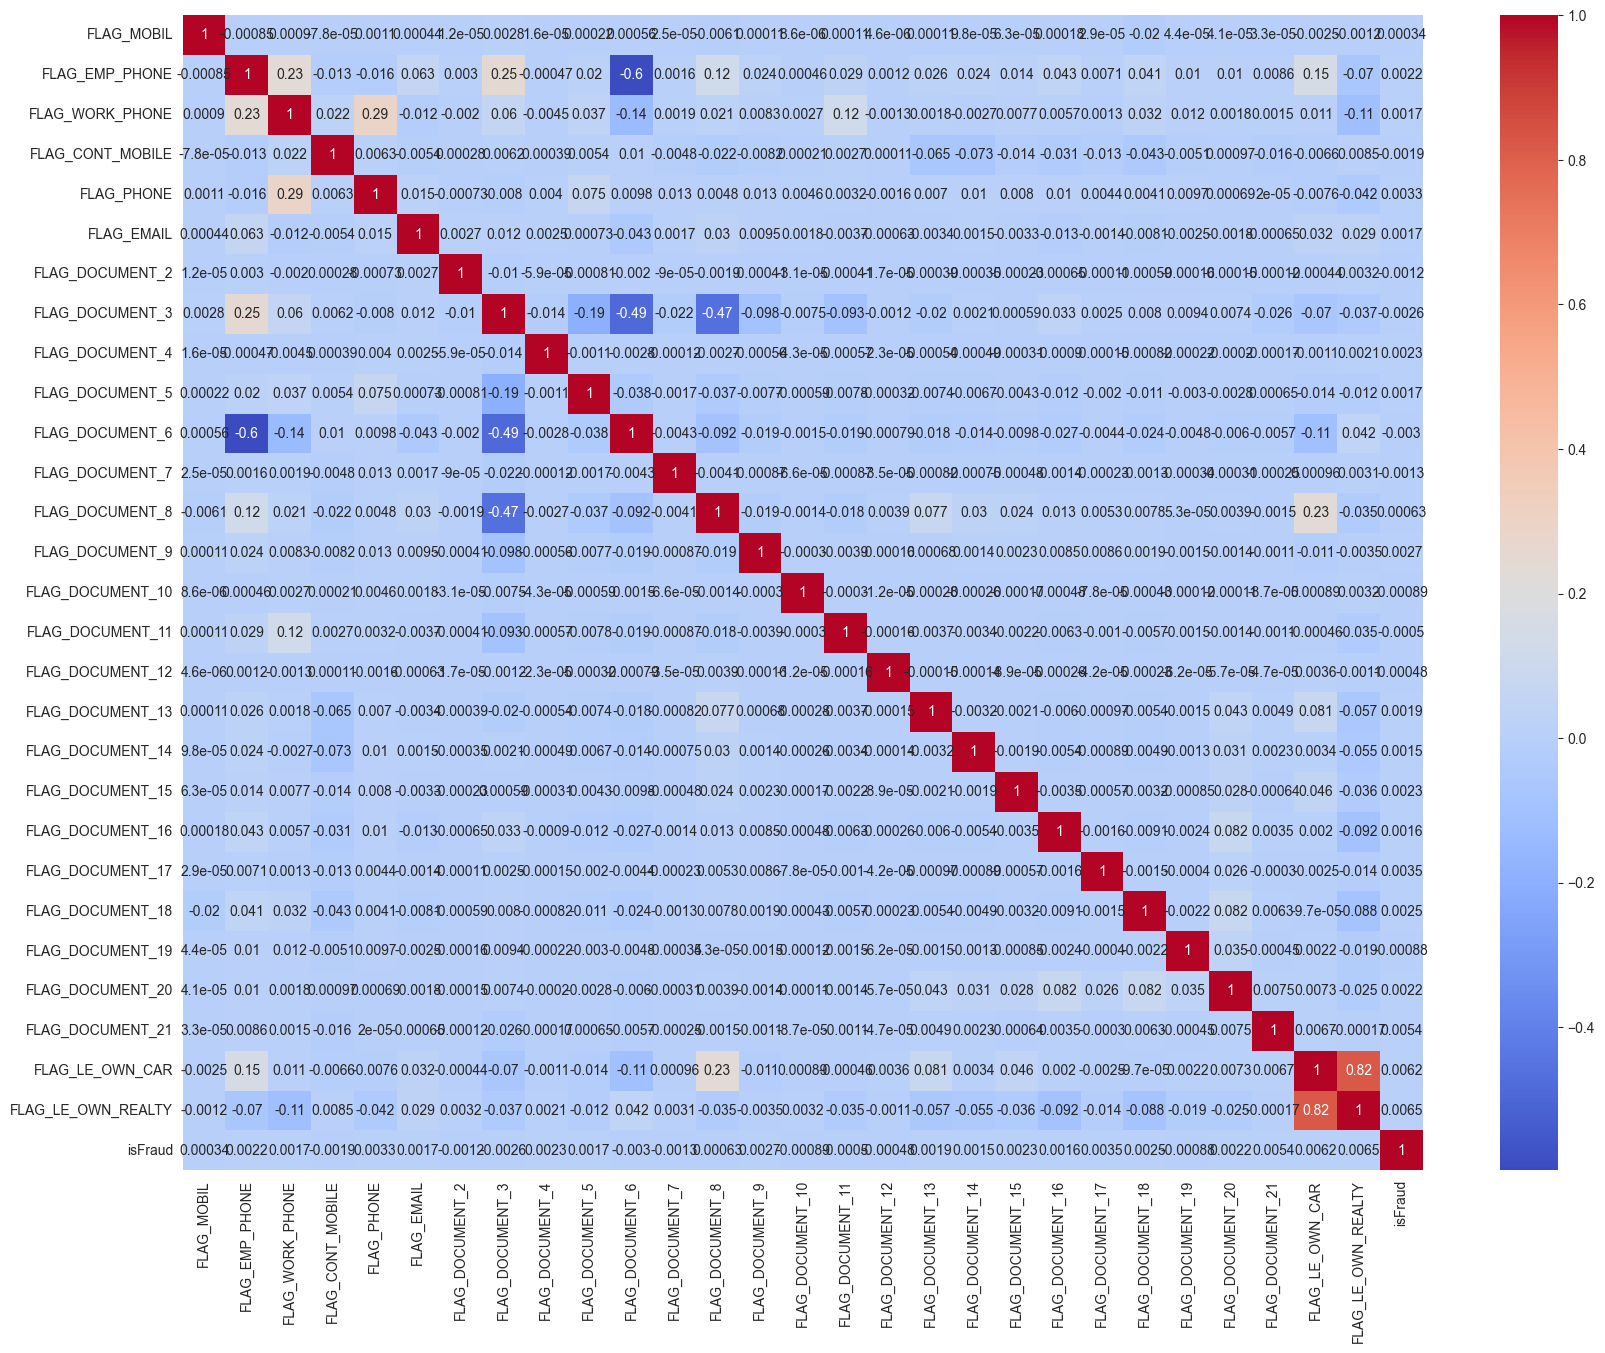

In [18]:
#Correlation between flag features and isFraud 
plt.rcParams['figure.figsize'] = [20,15]
corr_mtx = flag_df.corr(method='pearson')
sns.heatmap(corr_mtx,annot=True,cmap='coolwarm')

Above plot shows the correlation between flag features and isFraud flag. It's been shown clearly that there is no strong correlation between these features, hence we'll drop these features as well.

In [19]:
bank_data = bank_data.drop(['card1', 'card2', 'card3', 'card5', 'card6_new', 'card4_new', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_LE_OWN_CAR', 'FLAG_LE_OWN_REALTY','FONDKAPREMONT_MODE'],axis=1)

In [20]:
bank_data.shape

(590540, 97)

In [21]:
# Null Record counts
bank_data.isna().sum()

TransactionID                      0
isFraud                            0
TransactionDT                      0
TransactionAmt                     0
ProductCD                          0
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     324548
AMT_REQ_CREDIT_BUREAU_WEEK    324548
AMT_REQ_CREDIT_BUREAU_MON     324548
AMT_REQ_CREDIT_BUREAU_QRT     324548
AMT_REQ_CREDIT_BUREAU_YEAR    324548
Length: 97, dtype: int64

From above output we can say that most of the features have around 283029 records which are having null values which is approx. 47.9% of total records. 
We can slice this much data as there are NO VALUES present in any of the features to identify the fraud pattern within this or total dataset.

Now, same operation will perform on the records, i.e, lets identify the columns which have ALL NULL records and remove with keeping some threshold.
Note: We're performing these operations on new dataframe, if in any step we find distortion in data then we'll revert it by using the actual dataframe.

Dropping features whose null values are more than 65%, because its either binary or null data which wont be able to tell us the significance of the data

In [22]:
# Calculate the missing percentage of each feature
bank_missing_data = pd.DataFrame(bank_data.isna().sum().sort_values(ascending=False))
bank_missing_data.reset_index(inplace=True)
bank_missing_data = bank_missing_data.rename(columns={'index': 'Feature_cols',0:'sum_null_values'})
bank_missing_data['null_percentage'] = (bank_missing_data['sum_null_values']/590540)

In [23]:
bank_missing_data

,Feature_cols,sum_null_values,null_percentage
0,COMMONAREA_MODE,497894,0.843116
1,COMMONAREA_MEDI,497894,0.843116
2,COMMONAREA_AVG,497894,0.843116
3,NONLIVINGAPARTMENTS_MEDI,496543,0.840829
4,NONLIVINGAPARTMENTS_AVG,496543,0.840829
...,...,...,...
92,TransactionAmt,0,0.000000
93,TransactionDT,0,0.000000
94,isFraud,0,0.000000
95,ProductCD,0,0.000000


In [24]:
#Dropping features whose percentage is more than 65% or 0.65.
bank_subset = bank_data
bank_subset = bank_subset.drop(bank_missing_data[bank_missing_data['null_percentage']>0.65].Feature_cols.values, axis=1)
bank_subset.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2987000,0,86400,68.5,W,100002.0,Cash loans,M,0.0,202500.0,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2987001,0,86401,29.0,W,100003.0,Cash loans,F,0.0,270000.0,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,100004.0,Revolving loans,M,0.0,67500.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,100006.0,Cash loans,F,0.0,135000.0,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,100007.0,Cash loans,M,0.0,121500.0,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
bank_subset.shape

(590540, 49)

In [26]:
bank_subset.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CI

We have sliced data feature wise when there are more than 48% of the null data. Now we are going to **bulk delete** below features whose record values doesn't indicate any useful information while investigating fraudulent data.
LIVE_REGION_NOT_WORK_REGION
LIVE_CITY_NOT_WORK_CITY
REG_CITY_NOT_WORK_CITY
REG_REGION_NOT_LIVE_REGION
REG_CITY_NOT_LIVE_CITY
REG_REGION_NOT_WORK_REGION
REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT
FONDKAPREMONT_MODE_new
WEEKDAY_APPR_PROCESS_START
CNT_CHILDREN
CNT_FAM_MEMBERS
REGION_POPULATION_RELATIVE
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_BIRTH
TransactionAmt
TransactionDT
TransactionID
HOUR_APPR_PROCESS_START
EXT_SOURCE_2
EXT_SOURCE_3 
OBS_30_CNT_SOCIAL_CIRCLE 
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE 
DEF_60_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_HOUR',
AMT_REQ_CREDIT_BUREAU_DAY', 
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'

In [27]:
bank_subset = bank_subset.drop(columns=['LIVE_REGION_NOT_WORK_REGION',
'LIVE_CITY_NOT_WORK_CITY',
'REG_CITY_NOT_WORK_CITY',
'REG_REGION_NOT_LIVE_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_REGION_NOT_WORK_REGION',
'REGION_RATING_CLIENT_W_CITY',
'REGION_RATING_CLIENT',
'WEEKDAY_APPR_PROCESS_START',
'CNT_CHILDREN',
'CNT_FAM_MEMBERS',
'REGION_POPULATION_RELATIVE',
'DAYS_LAST_PHONE_CHANGE',
'DAYS_ID_PUBLISH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_BIRTH',
'HOUR_APPR_PROCESS_START',
'EXT_SOURCE_2',
'EXT_SOURCE_3', 
'OBS_30_CNT_SOCIAL_CIRCLE', 
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE', 
'DEF_60_CNT_SOCIAL_CIRCLE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY', 
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'TransactionAmt',
'TransactionDT',
'TransactionID'])

In [28]:
bank_subset.shape

(590540, 16)

In [29]:
bank_subset.columns

Index(['isFraud', 'ProductCD', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

Now from the dataset it can be seen that there are 283029 records which are totally blank along with feature name 'SK_ID_CURR', so its clear that there is no inference we'll get from these records at all. Hence, let's remove these records as well.

In [30]:
bank_subset = bank_subset.dropna(subset='SK_ID_CURR')

In [31]:
bank_subset.shape

(307511, 16)

So finally we got the actual dataset which can help us in identifying the fraudulent trends. 

In [32]:
#Creating subset of actual bank data dataframe
bank_subset.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,0,W,100002.0,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3
1,0,W,100003.0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,School
2,0,W,100004.0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government
3,0,W,100006.0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3
4,0,H,100007.0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion


# Exploratory Data Analysis #

After trimming down the data with some supportive features, lets explore sub data: bank_subset to indentify the target features. For doing so, we'll plot features to identify the actual target features.
Firstly we'll plot the 'isFraud' flag to understand how many fraud and non fraud cases are present.

<Axes: xlabel='isFraud', ylabel='count'>

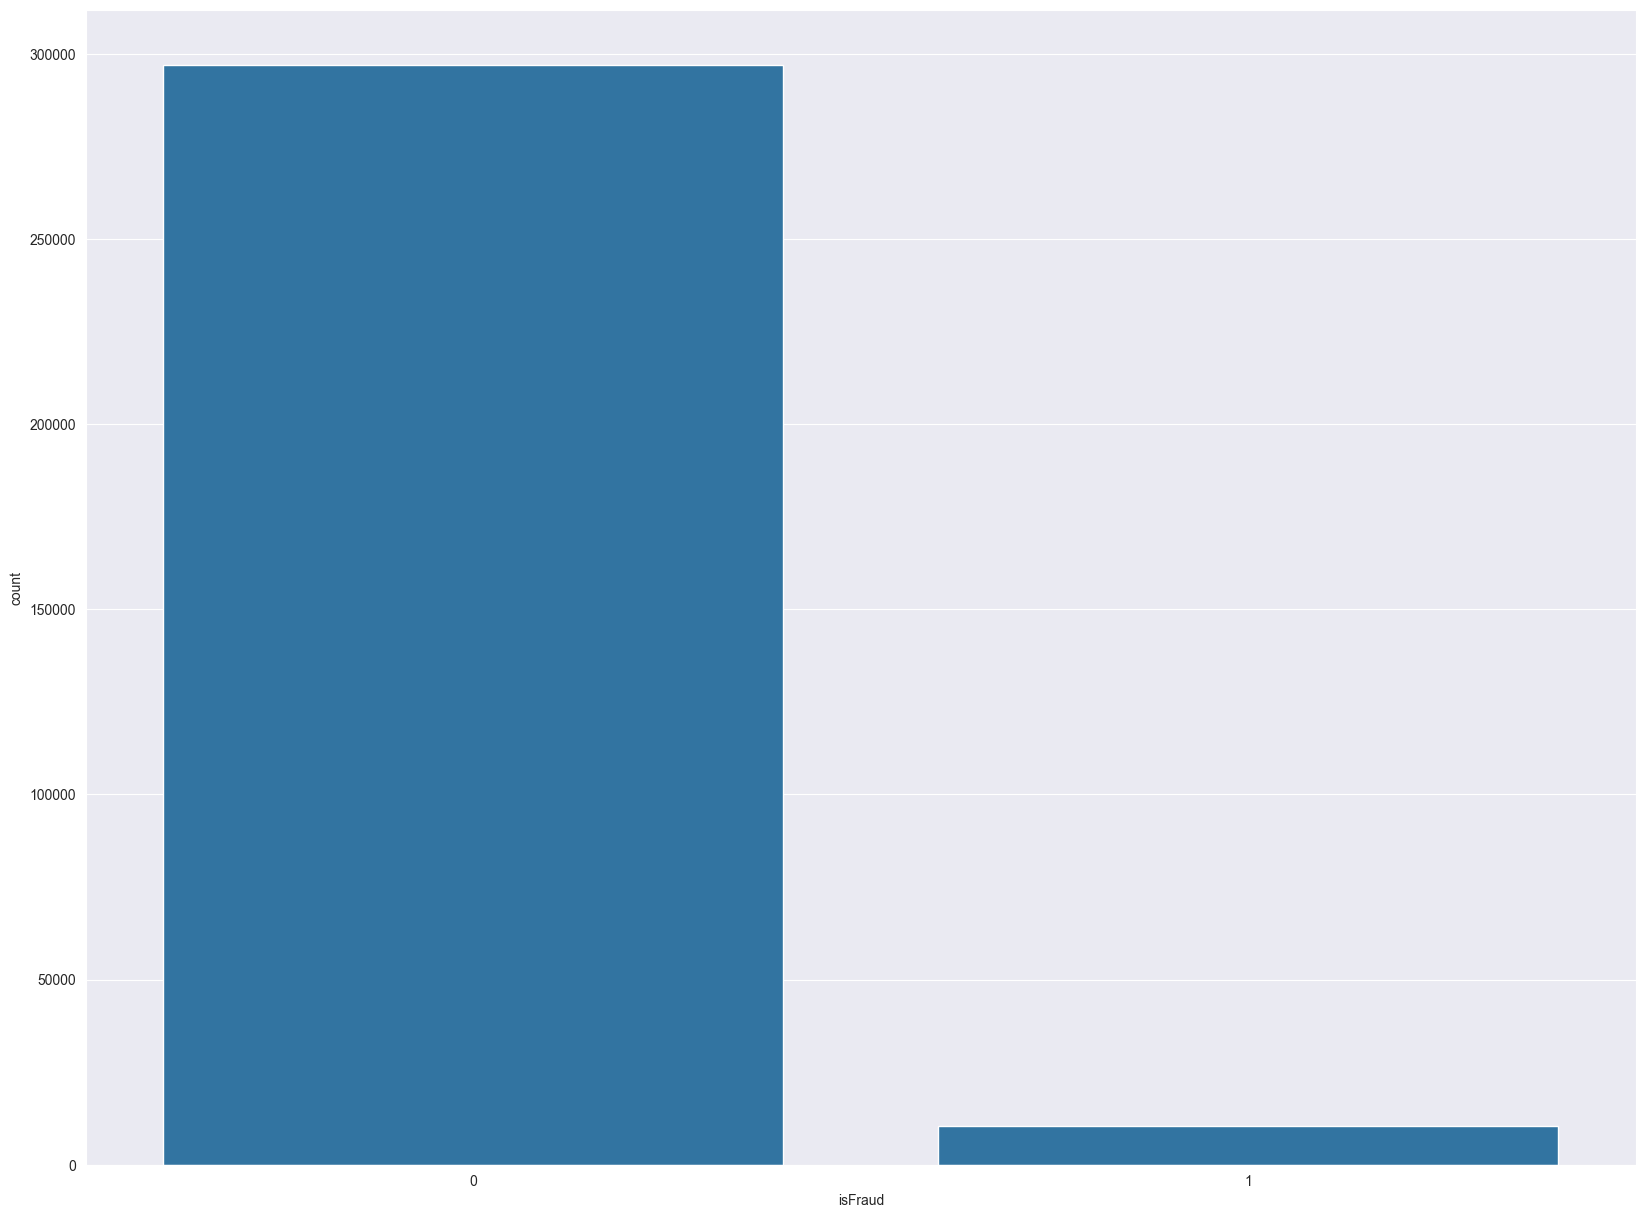

In [33]:
sns.countplot(data=bank_subset, x = 'isFraud')

The above plot  shows that our dataset is having more non-fraudulent than fraudulent data, which seems untrue after refining so much of garbage data.

In [34]:
#Shape of fraud and non fraud transactions
fraud_txn = bank_subset[bank_subset['isFraud']==1]
non_fraud_txn = bank_subset[bank_subset['isFraud']==0]

print(f'Shape of fraud transaction:{fraud_txn.shape}')
print(f'Shape of non fraud transaction: {non_fraud_txn.shape}')

Shape of fraud transaction:(10413, 16)
Shape of non fraud transaction: (297098, 16)


Let's figure out from AMT_ANNUITY feature, this feature indicates about the loan repayment.

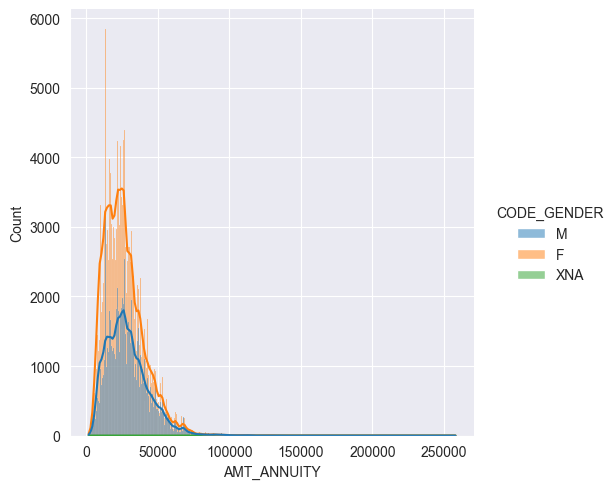

In [35]:
sns.displot(data=bank_subset, x = 'AMT_ANNUITY', kde = True, hue='CODE_GENDER')

Above plotting shows that we can deal with the **Continuous Data** of the 'AMT_ANNUITY' feature to analyse the dataset for the fraudulent transactions.
Now let's refine the missing data from this.

## Data Preprocessing ##

In this part, we'll identify the missing data, handle outliers and identify the correlation between the features.

In [36]:
# Find out how many null values present in all the features in the dataframe bank_subset

bank_subset.isna().sum()

isFraud                    0
ProductCD                  0
SK_ID_CURR                 0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY               12
AMT_GOODS_PRICE          278
NAME_TYPE_SUITE         1292
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
OCCUPATION_TYPE        96391
ORGANIZATION_TYPE          0
dtype: int64

Firstly, lets handle the missing data in AMT_ANNUITY feature. We'll use **Mean Median Imputation technique** to fill up the missing data

In [37]:
# Using mean or median imputation technique for missing data in AMT_ANNUITY feature 
# Lets find the mean and median of AMT_ANNUITY feature 
amt_annuity_mean = bank_subset.AMT_ANNUITY.mean()

print(f'The mean of AMT_ANNUITY feature is {amt_annuity_mean:.2f}')

The mean of AMT_ANNUITY feature is 27108.57


Now use these two values to fill the null values in new column 'Mean_ANNUITY_AMT'

In [38]:
bank_subset['Mean_ANNUITY_AMT'] = bank_subset.AMT_ANNUITY.fillna(amt_annuity_mean)
bank_subset.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,Mean_ANNUITY_AMT
0,0,W,100002.0,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24700.5
1,0,W,100003.0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,School,35698.5
2,0,W,100004.0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,6750.0
3,0,W,100006.0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,29686.5
4,0,H,100007.0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,21865.5


Above table shows that we've  successfully replaced missing numerical data type with mean and median values. Let's plot the mean and median along with the actual plot to verify how it affected the actual data

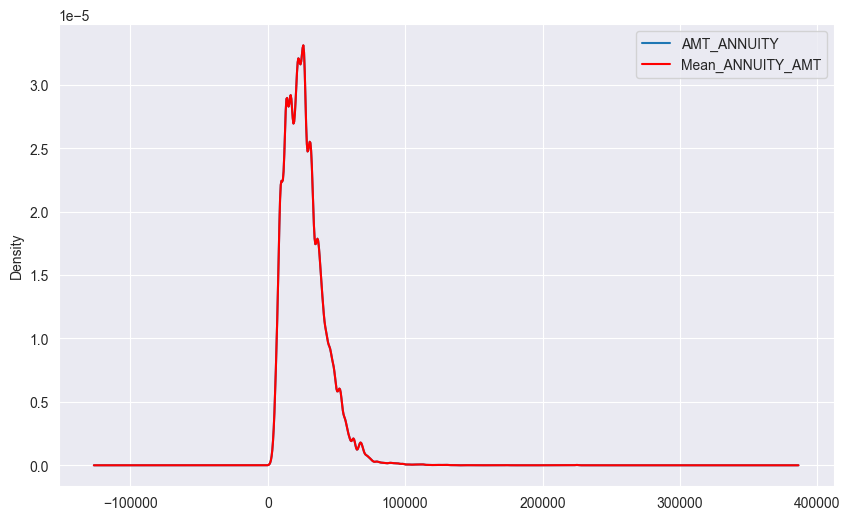

In [39]:
plt.rcParams['figure.figsize'] = [10,6]
fig = plt.figure()
ax = fig.add_subplot(111)

bank_subset['AMT_ANNUITY'].plot(kind = 'kde', ax=ax)
bank_subset['Mean_ANNUITY_AMT'].plot(kind='kde', ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

From above plotting we can infer that after filling missing data at annuity amount feature, there is no disruption in the actual annuity amount plotting. Also, we can observe that the mean is tracing the same path as the actual data of AMT_ANNUITY feature.

Now lets find the outliers in 'Mean_ANNUITY_AMT' feature.

<Axes: ylabel='Mean_ANNUITY_AMT'>

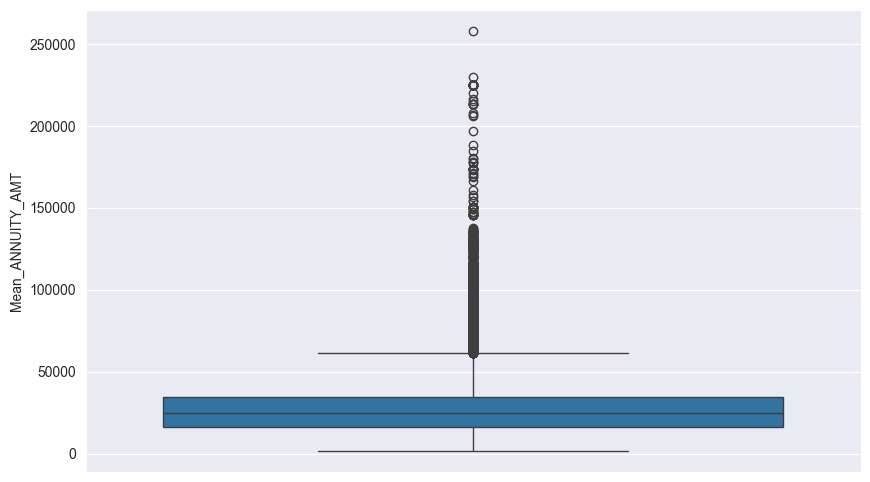

In [40]:
sns.boxplot(data=bank_subset, y = 'Mean_ANNUITY_AMT')

From above plotting we can identify that there are humongous amount of outliers present in the Mean_ANNUITY_AMT. 
*Note: We're using Mean_ANNUITY_AMT feature from now on as before we saw that the mean and median annuity amount have not much difference*

Now lets start cleaning these outliers from this feature. For this we'll use **Outlier Capping methodology using IQR**.

In [41]:
# IQR formulas to identify the upper and lower limit of quartile

IQR = bank_subset['Mean_ANNUITY_AMT'].quantile(0.75) - bank_subset['Mean_ANNUITY_AMT'].quantile(0.25)
lower_annuity_amt = bank_subset['Mean_ANNUITY_AMT'].quantile(0.25) - (IQR * 1.5)
upper_annuity_amt = bank_subset['Mean_ANNUITY_AMT'].quantile(0.75) + (IQR * 1.5)
print(lower_annuity_amt, upper_annuity_amt)

-10584.0 61704.0


Now we'll replace the outliers values by upper and lower limits.

In [42]:
bank_subset['Mean_ANNUITY_AMT'] = np.where(bank_subset['Mean_ANNUITY_AMT']>upper_annuity_amt, upper_annuity_amt,np.where(bank_subset['Mean_ANNUITY_AMT']<lower_annuity_amt,lower_annuity_amt,bank_subset['Mean_ANNUITY_AMT']))

<Axes: ylabel='Mean_ANNUITY_AMT'>

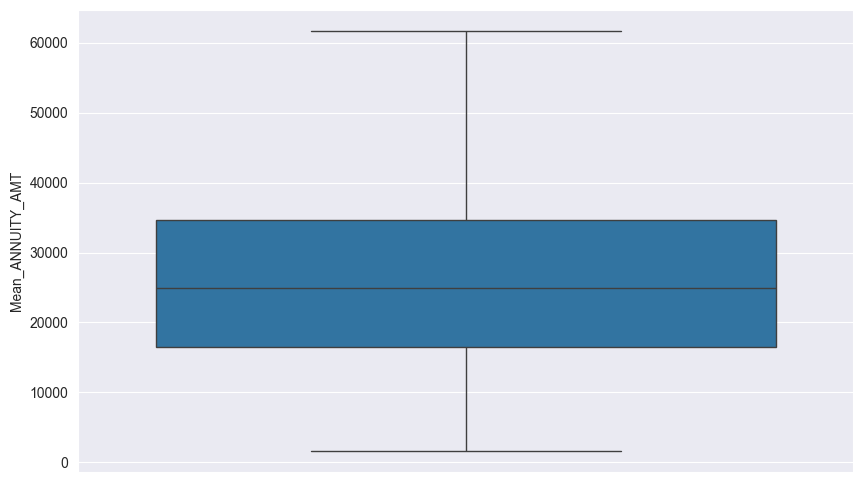

In [43]:
sns.boxplot(data=bank_subset, y = 'Mean_ANNUITY_AMT')

Above boxplot now provides the cleaner data where we don't have anymore outliers present in the Mean_AMOUNT_ANNUITY feature.

In [44]:
bank_subset.Mean_ANNUITY_AMT.isna().sum()

0

Like wise we'll use mean/median imputation techniques for other AMT features to handle outliers.

In [45]:
''' For AMT_INCOME_TOTAL'''
bank_subset.AMT_INCOME_TOTAL.isna().sum()

0

As there is no null values hence we wont use any imputation technique for handling missing data and outliers. Now lets check AMT_CREDIT

In [46]:
bank_subset.AMT_CREDIT.isna().sum()

0

Same for AMT_CREDIT. Now we'll check AMT_GOOD_PRICE
Note: We'll check these features {AMT_INCOME_TOTAL, AMT_CREDIT}to identify the conclusion for fraudulent transactions

In [47]:
bank_subset.AMT_GOODS_PRICE.isna().sum()

278

Lets use mean imputation technique to remove outliers and missing data for AMT_GOODS_PRICE.

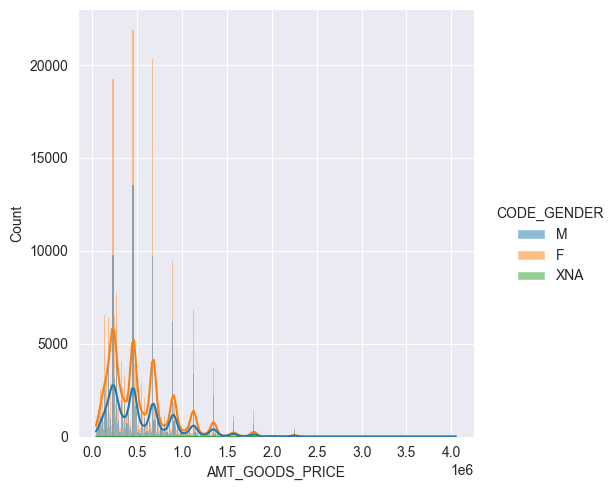

In [48]:
sns.displot(data=bank_subset, x = 'AMT_GOODS_PRICE', kde = True, hue='CODE_GENDER')

In [49]:
# Using mean imputation technique for missing data in AMT_GOODS_PRICE feature 
# Lets find the mean of AMT_GOODS_PRICE feature 
amt_goods_mean = bank_subset.AMT_GOODS_PRICE.mean()

print(f'The mean of AMT_ANNUITY feature is {amt_goods_mean:.2f}')

The mean of AMT_ANNUITY feature is 538396.21


In [50]:
bank_subset['Mean_GOODS_AMT'] = bank_subset.AMT_GOODS_PRICE.fillna(amt_goods_mean)
bank_subset.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT
0,0,W,100002.0,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24700.5,351000.0
1,0,W,100003.0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,School,35698.5,1129500.0
2,0,W,100004.0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,6750.0,135000.0
3,0,W,100006.0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,29686.5,297000.0
4,0,H,100007.0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,21865.5,513000.0


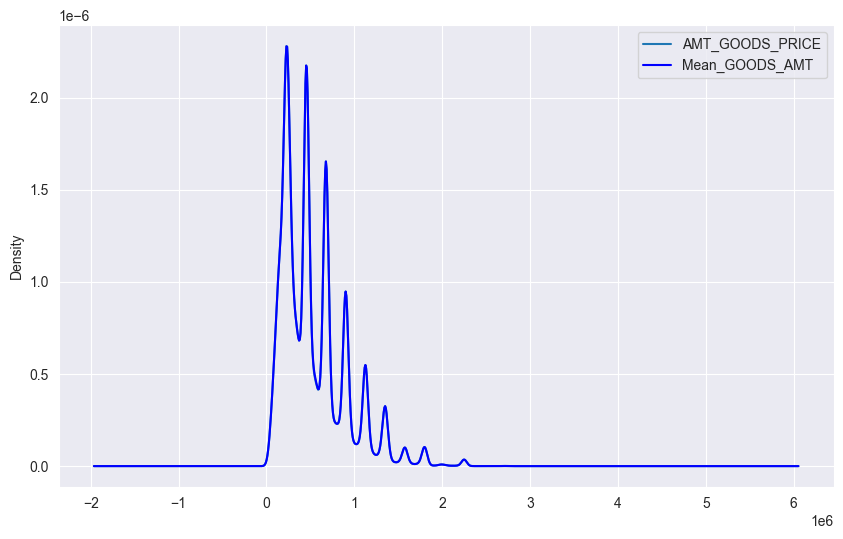

In [51]:
plt.rcParams['figure.figsize'] = [10,6]
fig = plt.figure()
ax = fig.add_subplot(111)

bank_subset['AMT_GOODS_PRICE'].plot(kind = 'kde', ax=ax)
bank_subset['Mean_GOODS_AMT'].plot(kind='kde', ax=ax,color='blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

From above plotting we can infer that after filling missing data at goods amount feature, there is no disruption in the actual goods amount plotting. Also, we can observe that the mean is tracing the same path as the actual data of AMT_GOODS_PRICE feature.

In [52]:
bank_subset['Mean_GOODS_AMT'].isna().sum()

0

Handling missing data in categorical features now!!

In [53]:
'''Count of missing data'''
bank_subset.isna().sum()

isFraud                    0
ProductCD                  0
SK_ID_CURR                 0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY               12
AMT_GOODS_PRICE          278
NAME_TYPE_SUITE         1292
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
OCCUPATION_TYPE        96391
ORGANIZATION_TYPE          0
Mean_ANNUITY_AMT           0
Mean_GOODS_AMT             0
dtype: int64

Only Name Type Suite and OCCUPATION TYPE has missing values

In [54]:
'''Name Type Suite missing data handling'''
#Using Frequency Categorical Data Imputation
bank_subset.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [55]:
bank_subset['NAME_TYPE_SUITE']=bank_subset.NAME_TYPE_SUITE.fillna('Unaccompanied')

In [56]:
bank_subset.NAME_TYPE_SUITE.isna().sum()

0

In [57]:
'''Occupation Type Suite Missing Data'''
#Using Frequency Categorical Data Imputation
bank_subset.OCCUPATION_TYPE.mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [58]:
bank_subset['OCCUPATION_TYPE'] = bank_subset.OCCUPATION_TYPE.fillna('laborers')

In [59]:
bank_subset.OCCUPATION_TYPE.isna().sum()

0

# Data Visualization #

Now we'll visualize all data and understand the inference from them.

Let's plot first the product code to identify that in which product got hit by fraudulent transactions.

<Axes: xlabel='ProductCD', ylabel='count'>

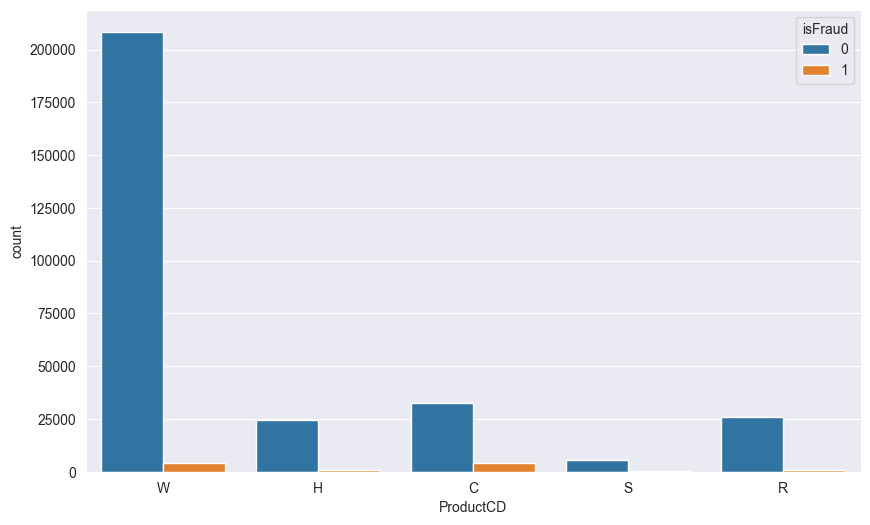

In [60]:
sns.countplot(data=bank_subset, x = 'ProductCD', hue='isFraud')

From above plotting we can understand that Product W and C has more fraudulent transactions than other products, lets find the percentage of both products to identify which product from these two has fraud transaction.

In [61]:
bank_subset.shape

(307511, 18)

In [62]:
product_data = bank_subset[['ProductCD','isFraud']]
product_data = product_data.value_counts()
product_data.head(10)

ProductCD  isFraud
W          0          208507
C          0           32551
R          0           25999
H          0           24619
S          0            5422
W          1            4311
C          1            3899
H          1            1032
R          1             847
S          1             324
Name: count, dtype: int64

From above dataframe, C product got fraud hit 3899 times and W product 4311 times.
**Conclusion1: This concludes that Product W has been encountered most frauds amongst all the product codes**

Now we'll indentify which kind of Contract types has more chances of frauds.

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

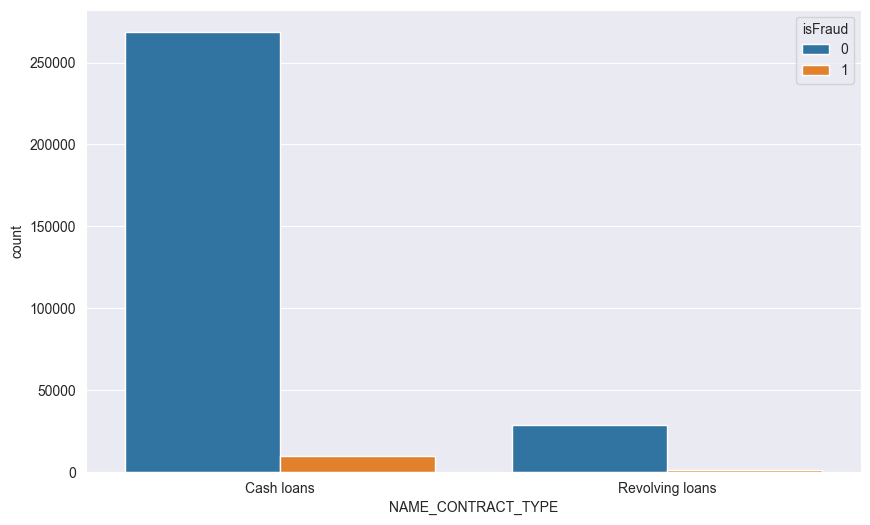

In [63]:
sns.countplot(data=bank_subset, x = 'NAME_CONTRACT_TYPE', hue='isFraud')

In [64]:
contract_data = bank_subset.groupby(['NAME_CONTRACT_TYPE','isFraud']).size().reset_index(name='count')
print(contract_data)

  NAME_CONTRACT_TYPE  isFraud   count
0         Cash loans        0  268905
1         Cash loans        1    9327
2    Revolving loans        0   28193
3    Revolving loans        1    1086


From above count feature its clear that the Fraud happened mostly with cash loans against revolving loans.
**Conclusion 2: Customer who took Cash Loans has done more frauds**

Now we'll use Equal Width Discretization technique to identify the sets of amount fields where most of the frauds happened.

In [65]:
bank_subset.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT
0,0,W,100002.0,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24700.5,351000.0
1,0,W,100003.0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,School,35698.5,1129500.0
2,0,W,100004.0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,6750.0,135000.0
3,0,W,100006.0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,29686.5,297000.0
4,0,H,100007.0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,21865.5,513000.0


In [66]:
''' Custom Discretization on AMT_INCOME_TOTAL'''
bins = [0,25000,100000,500000,10000000,50000000,100000000,120000000]
total_bins = ['0-25000','25000-100000','100000-500000','500000-10000000','10000000-50000000','50000000-100000000','100000000-120000000']

In [67]:
bank_subset['income_bins'] = pd.cut(bank_subset['AMT_INCOME_TOTAL'], bins=bins,labels=total_bins, include_lowest=True)
bank_subset.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins
0,0,W,100002.0,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24700.5,351000.0,100000-500000
1,0,W,100003.0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,School,35698.5,1129500.0,100000-500000
2,0,W,100004.0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,6750.0,135000.0,25000-100000
3,0,W,100006.0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,29686.5,297000.0,100000-500000
4,0,H,100007.0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,21865.5,513000.0,100000-500000


/var/folders/z8/d8n87xks20g7k6qydrl_sqy40000gn/T/ipykernel_5939/3453110542.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bank_subset.groupby('income_bins')['AMT_INCOME_TOTAL'].count().plot.bar()


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0-25000'),
  Text(1, 0, '25000-100000'),
  Text(2, 0, '100000-500000'),
  Text(3, 0, '500000-10000000'),
  Text(4, 0, '10000000-50000000'),
  Text(5, 0, '50000000-100000000'),
  Text(6, 0, '100000000-120000000')])

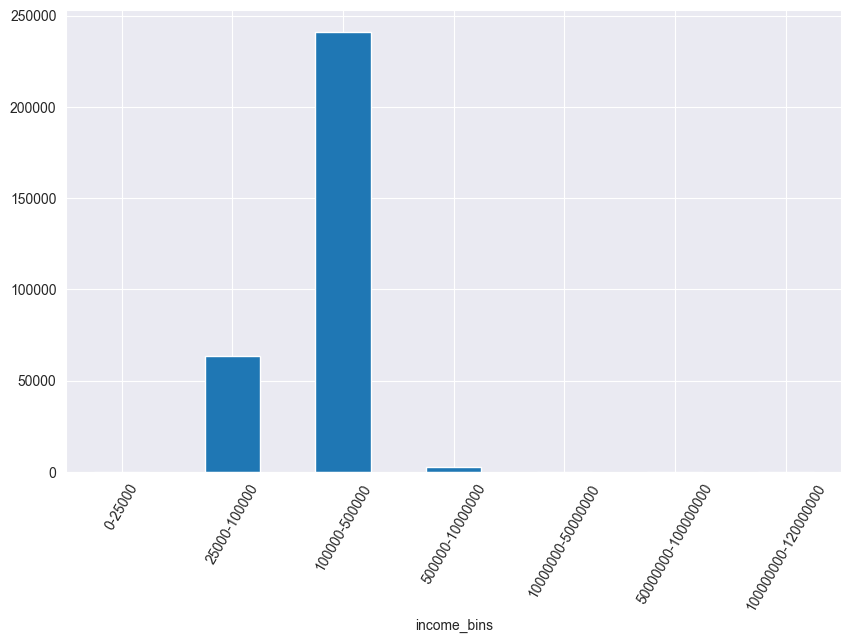

In [68]:
bank_subset.groupby('income_bins')['AMT_INCOME_TOTAL'].count().plot.bar()
plt.xticks(rotation = 60)

**Conclusion 3: Customer within income group of 100000-500000 has done most fraud**

In [69]:
'''Custom Discretization on Mean_AMT_ANNUITY'''
#Create a list of range values and the discrete bins
bucket = [0,16000,32000,48000,64000]
ann_tot_bin = ['0-16000','16000-32000','32000-48000','48000-64000']
bank_subset['ann_bins'] = pd.cut(bank_subset['Mean_ANNUITY_AMT'],bins=bucket,labels=ann_tot_bin,include_lowest=True)
bank_subset.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,W,100002.0,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24700.5,351000.0,100000-500000,16000-32000
1,0,W,100003.0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,School,35698.5,1129500.0,100000-500000,32000-48000
2,0,W,100004.0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,6750.0,135000.0,25000-100000,0-16000
3,0,W,100006.0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,29686.5,297000.0,100000-500000,16000-32000
4,0,H,100007.0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,21865.5,513000.0,100000-500000,16000-32000


/var/folders/z8/d8n87xks20g7k6qydrl_sqy40000gn/T/ipykernel_5939/3510008756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bank_subset.groupby('ann_bins')['Mean_ANNUITY_AMT'].count().plot.bar()


<Axes: xlabel='ann_bins'>

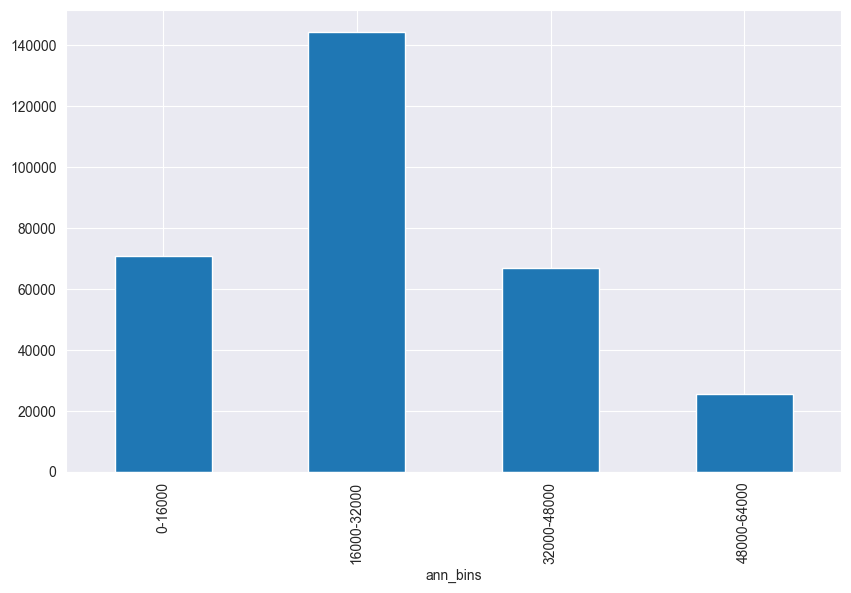

In [70]:
bank_subset.groupby('ann_bins')['Mean_ANNUITY_AMT'].count().plot.bar()

**Conclusion 4: Customer whose annuity is between 16000-32000 are doing most fraud**

Now we'll explore all categorical data together to conclude defaulters.

<Axes: xlabel='CODE_GENDER', ylabel='count'>

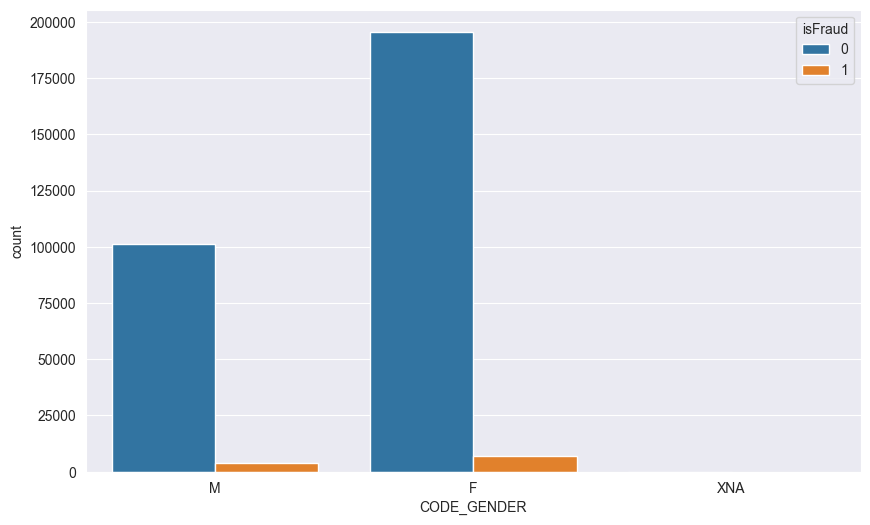

In [71]:
# ['CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']
'''For CODE_GENDER'''
sns.countplot(data=bank_subset,x = 'CODE_GENDER',hue = 'isFraud')

In [72]:
gender_data = bank_subset.groupby(['CODE_GENDER','isFraud']).size().reset_index(name='count')
print(gender_data)

  CODE_GENDER  isFraud   count
0           F        0  195701
1           F        1    6747
2           M        0  101393
3           M        1    3666
4         XNA        0       4


Females have done more fraud than mens.

<Axes: xlabel='NAME_TYPE_SUITE', ylabel='count'>

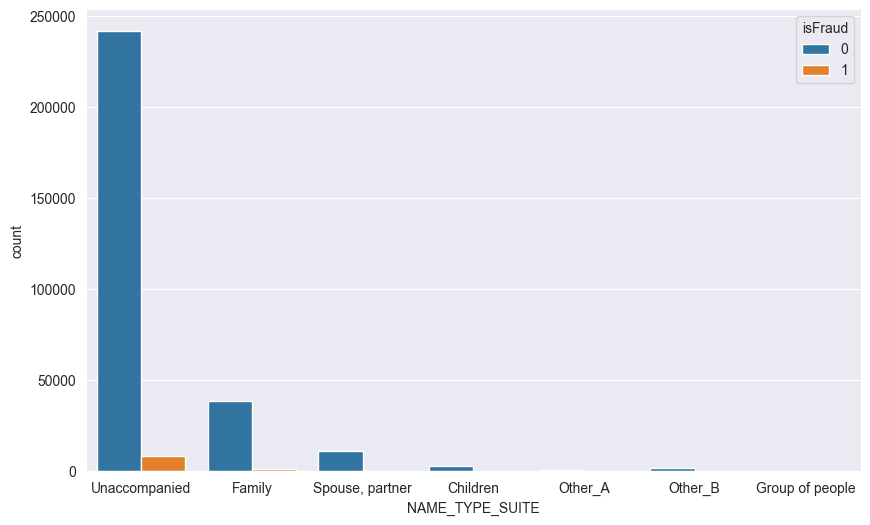

In [73]:
'''For NAME_TYPE_SUITE'''
sns.countplot(data=bank_subset,x = 'NAME_TYPE_SUITE',hue = 'isFraud')

It shows that applicants who came to bank alone to apply loan are the most suspicious ones for fraudulent transactions.  

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Working'),
  Text(1, 0, 'State servant'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

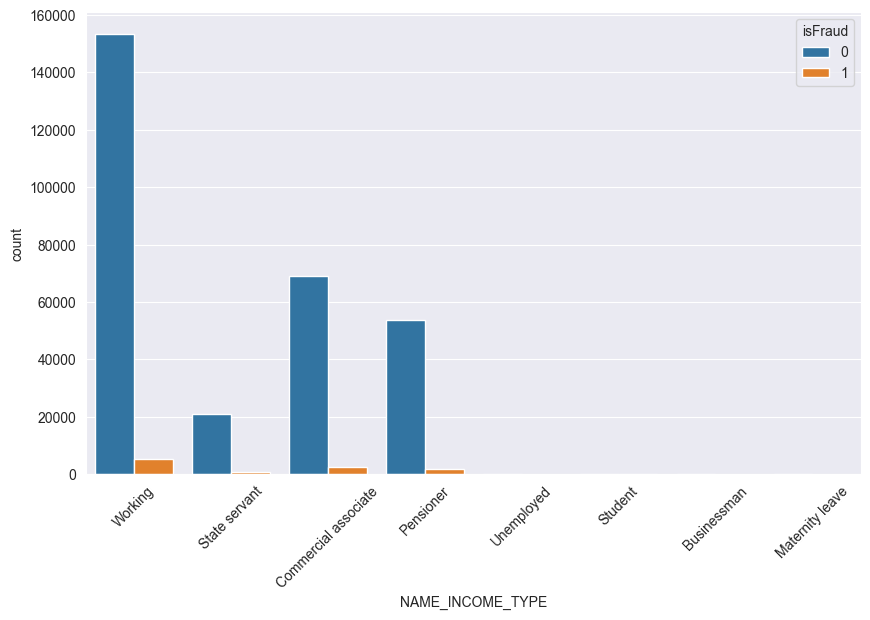

In [74]:
'''For NAME_INCOME_TYPE'''
sns.countplot(data=bank_subset,x = 'NAME_INCOME_TYPE',hue = 'isFraud')
plt.xticks(rotation=45)

Above plotting shows that the culprits had "working" income type.

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

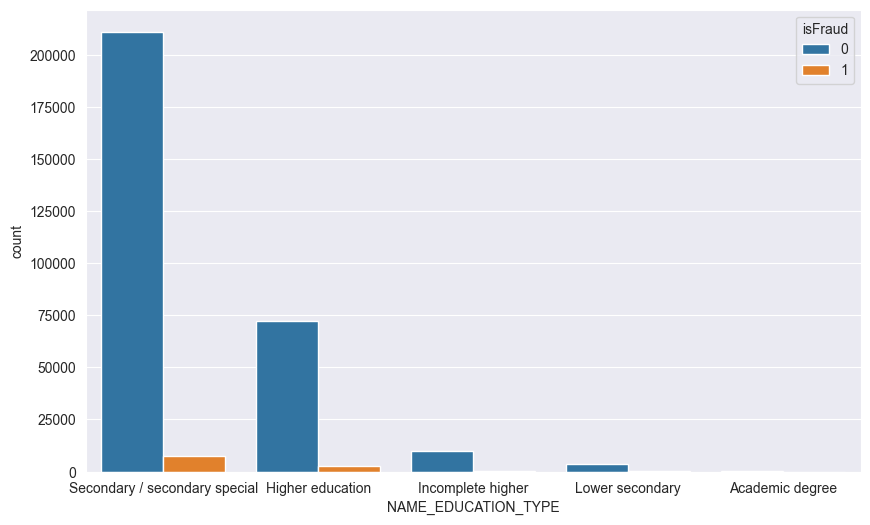

In [75]:
'''For NAME_EDUCATION_TYPE'''
sns.countplot(data=bank_subset,x = 'NAME_EDUCATION_TYPE',hue = 'isFraud')

Customers with qualification as secondary/secondary special done most frauds

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'laborers'),
  Text(5, 0, 'Drivers'),
  Text(6, 0, 'Sales staff'),
  Text(7, 0, 'Cleaning staff'),
  Text(8, 0, 'Cooking staff'),
  Text(9, 0, 'Private service staff'),
  Text(10, 0, 'Medicine staff'),
  Text(11, 0, 'Security staff'),
  Text(12, 0, 'High skill tech staff'),
  Text(13, 0, 'Waiters/barmen staff'),
  Text(14, 0, 'Low-skill Laborers'),
  Text(15, 0, 'Realty agents'),
  Text(16, 0, 'Secretaries'),
  Text(17, 0, 'IT staff'),
  Text(18, 0, 'HR staff')])

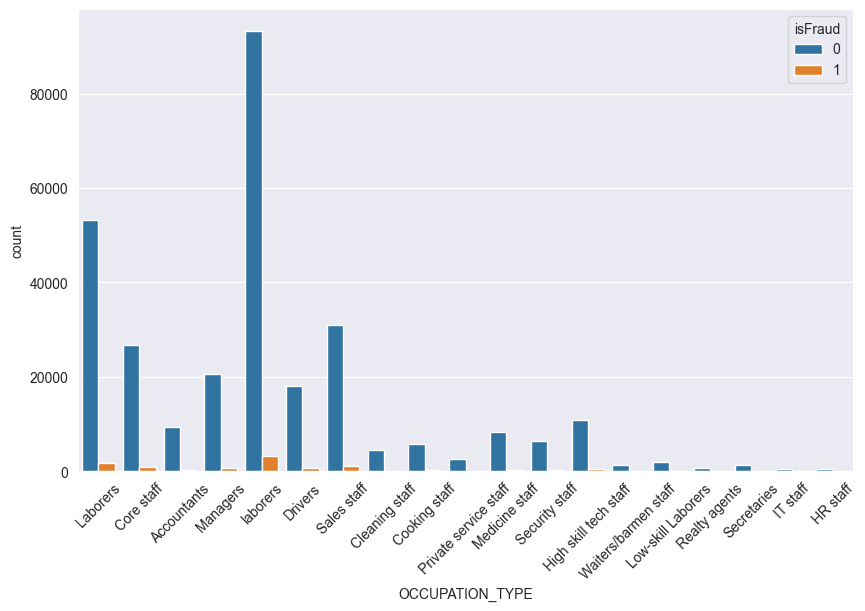

In [76]:
'''For OCCUPATION_TYPE'''
sns.countplot(data=bank_subset,x = 'OCCUPATION_TYPE',hue = 'isFraud')
plt.xticks(rotation = 45)

Customer with class 'Laborers' has done most of the fraudulent transactions

In [77]:
bank_subset.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,W,100002.0,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24700.5,351000.0,100000-500000,16000-32000
1,0,W,100003.0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,School,35698.5,1129500.0,100000-500000,32000-48000
2,0,W,100004.0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,6750.0,135000.0,25000-100000,0-16000
3,0,W,100006.0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,29686.5,297000.0,100000-500000,16000-32000
4,0,H,100007.0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,21865.5,513000.0,100000-500000,16000-32000


In [78]:
# #Dropping unused features to get the cleaner data
bank_subset=bank_subset.drop(['AMT_GOODS_PRICE','NAME_FAMILY_STATUS','ORGANIZATION_TYPE','AMT_ANNUITY'],axis=1,inplace=False)

In [79]:
#The actual dataframe shape which is providing actual information about the fraudulent data.
bank_subset.shape

(307511, 16)

Text(0.5, 1.0, 'isFraud Distribution: Mean_ANNUITY_AMT')

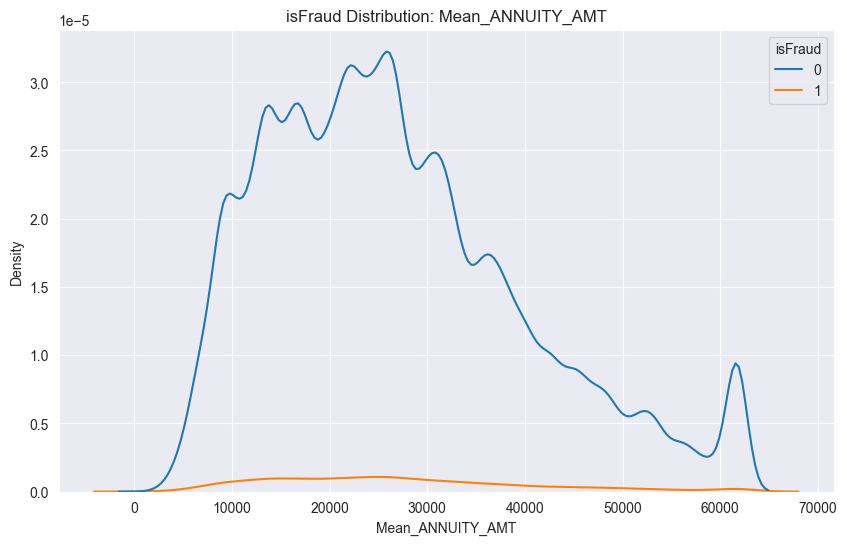

In [98]:
sns.kdeplot(data=bank_subset,x='Mean_ANNUITY_AMT',hue = 'isFraud')
plt.title('isFraud Distribution: Mean_ANNUITY_AMT')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'laborers'),
  Text(5, 0, 'Drivers'),
  Text(6, 0, 'Sales staff'),
  Text(7, 0, 'Cleaning staff'),
  Text(8, 0, 'Cooking staff'),
  Text(9, 0, 'Private service staff'),
  Text(10, 0, 'Medicine staff'),
  Text(11, 0, 'Security staff'),
  Text(12, 0, 'High skill tech staff'),
  Text(13, 0, 'Waiters/barmen staff'),
  Text(14, 0, 'Low-skill Laborers'),
  Text(15, 0, 'Realty agents'),
  Text(16, 0, 'Secretaries'),
  Text(17, 0, 'IT staff'),
  Text(18, 0, 'HR staff')])

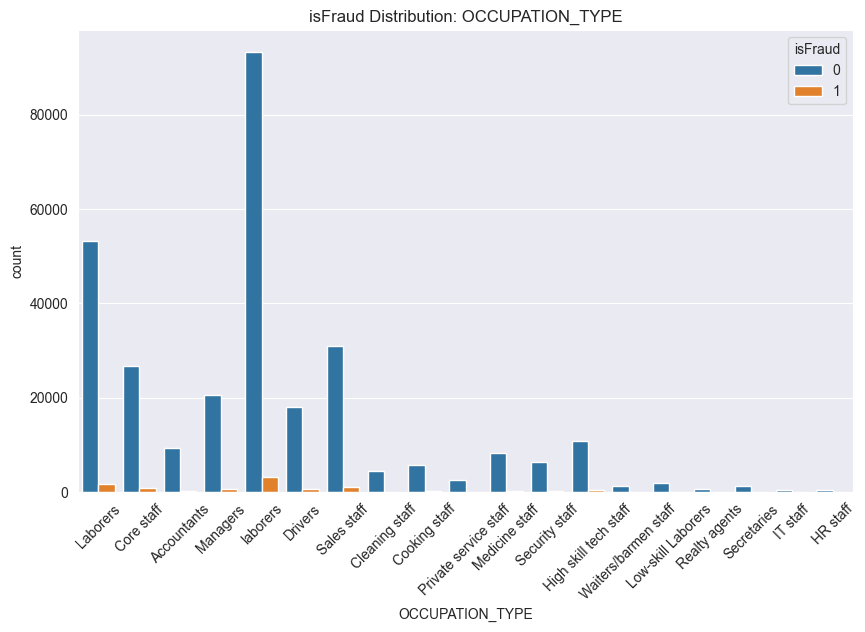

In [99]:

sns.countplot(data=bank_subset,x='OCCUPATION_TYPE',hue = 'isFraud')
plt.title('isFraud Distribution: OCCUPATION_TYPE')
plt.xticks(rotation=45)

# Data Manipulation #

In [84]:
'''Mean Normalization on Mean_AMT_ANNUITY'''
mean_vals = bank_subset['Mean_ANNUITY_AMT'].mean(axis=0)
mean_vals

26797.743218574004

In [85]:
range_vals = bank_subset['Mean_ANNUITY_AMT'].max(axis=0)-bank_subset['Mean_ANNUITY_AMT'].min(axis=0)
range_vals

60088.5

<Axes: xlabel='Mean_ANNUITY_AMT', ylabel='Density'>

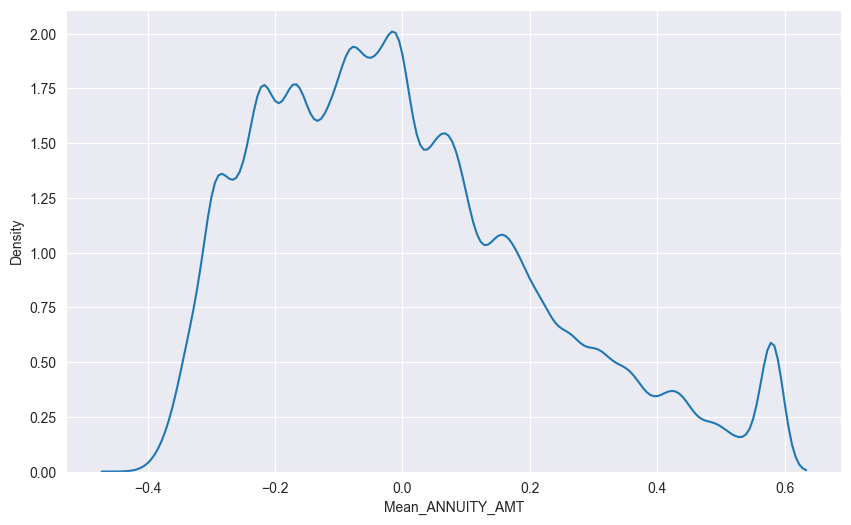

In [86]:
bank_subset_scaled = (bank_subset['Mean_ANNUITY_AMT']-mean_vals)/range_vals
sns.kdeplot(bank_subset_scaled)

# Data Modelling #

In [100]:
bank_subset.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,W,100002.0,Cash loans,M,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,24700.5,351000.0,100000-500000,16000-32000
1,0,W,100003.0,Cash loans,F,270000.0,1293502.5,Family,State servant,Higher education,House / apartment,Core staff,35698.5,1129500.0,100000-500000,32000-48000
2,0,W,100004.0,Revolving loans,M,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,6750.0,135000.0,25000-100000,0-16000
3,0,W,100006.0,Cash loans,F,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,29686.5,297000.0,100000-500000,16000-32000
4,0,H,100007.0,Cash loans,M,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,Core staff,21865.5,513000.0,100000-500000,16000-32000


We'll encode all categorical data into numerical data using Frequency Encoding technique. So that we can push the final dataframe into blackbox model.

In [102]:
'''Frequency Encoding for ProductCD'''
trust_bank_data = bank_subset
Prod_val_count = trust_bank_data['ProductCD'].value_counts().to_dict()
trust_bank_data['ProductCD'] = trust_bank_data['ProductCD'].map(Prod_val_count)
trust_bank_data.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,212818,100002.0,Cash loans,M,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,24700.5,351000.0,100000-500000,16000-32000
1,0,212818,100003.0,Cash loans,F,270000.0,1293502.5,Family,State servant,Higher education,House / apartment,Core staff,35698.5,1129500.0,100000-500000,32000-48000
2,0,212818,100004.0,Revolving loans,M,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,6750.0,135000.0,25000-100000,0-16000
3,0,212818,100006.0,Cash loans,F,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,29686.5,297000.0,100000-500000,16000-32000
4,0,25651,100007.0,Cash loans,M,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,Core staff,21865.5,513000.0,100000-500000,16000-32000


In [103]:
'''Frequency Encoding for NAME_CONTRACT_TYPE'''
contr_val_count = trust_bank_data['NAME_CONTRACT_TYPE'].value_counts().to_dict()
trust_bank_data['NAME_CONTRACT_TYPE'] = trust_bank_data['NAME_CONTRACT_TYPE'].map(contr_val_count)
trust_bank_data.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,212818,100002.0,278232,M,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,24700.5,351000.0,100000-500000,16000-32000
1,0,212818,100003.0,278232,F,270000.0,1293502.5,Family,State servant,Higher education,House / apartment,Core staff,35698.5,1129500.0,100000-500000,32000-48000
2,0,212818,100004.0,29279,M,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,6750.0,135000.0,25000-100000,0-16000
3,0,212818,100006.0,278232,F,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,29686.5,297000.0,100000-500000,16000-32000
4,0,25651,100007.0,278232,M,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,Core staff,21865.5,513000.0,100000-500000,16000-32000


In [104]:
'''Frequency Encoding for CODE_GENDER'''
gend_val_count = trust_bank_data['CODE_GENDER'].value_counts().to_dict()
trust_bank_data['CODE_GENDER'] = trust_bank_data['CODE_GENDER'].map(gend_val_count)
trust_bank_data.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,212818,100002.0,278232,105059,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,24700.5,351000.0,100000-500000,16000-32000
1,0,212818,100003.0,278232,202448,270000.0,1293502.5,Family,State servant,Higher education,House / apartment,Core staff,35698.5,1129500.0,100000-500000,32000-48000
2,0,212818,100004.0,29279,105059,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,6750.0,135000.0,25000-100000,0-16000
3,0,212818,100006.0,278232,202448,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,29686.5,297000.0,100000-500000,16000-32000
4,0,25651,100007.0,278232,105059,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,House / apartment,Core staff,21865.5,513000.0,100000-500000,16000-32000


In [105]:
'''Frequency Encoding for NAME_TYPE_SUITE'''
typ_val_count = trust_bank_data['NAME_TYPE_SUITE'].value_counts().to_dict()
trust_bank_data['NAME_TYPE_SUITE'] = trust_bank_data['NAME_TYPE_SUITE'].map(typ_val_count)
trust_bank_data.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,212818,100002.0,278232,105059,202500.0,406597.5,249818,Working,Secondary / secondary special,House / apartment,Laborers,24700.5,351000.0,100000-500000,16000-32000
1,0,212818,100003.0,278232,202448,270000.0,1293502.5,40149,State servant,Higher education,House / apartment,Core staff,35698.5,1129500.0,100000-500000,32000-48000
2,0,212818,100004.0,29279,105059,67500.0,135000.0,249818,Working,Secondary / secondary special,House / apartment,Laborers,6750.0,135000.0,25000-100000,0-16000
3,0,212818,100006.0,278232,202448,135000.0,312682.5,249818,Working,Secondary / secondary special,House / apartment,Laborers,29686.5,297000.0,100000-500000,16000-32000
4,0,25651,100007.0,278232,105059,121500.0,513000.0,249818,Working,Secondary / secondary special,House / apartment,Core staff,21865.5,513000.0,100000-500000,16000-32000


In [106]:
'''Frequency Encoding for NAME_INCOME_TYPE'''
inc_val_count = trust_bank_data['NAME_INCOME_TYPE'].value_counts().to_dict()
trust_bank_data['NAME_INCOME_TYPE'] = trust_bank_data['NAME_INCOME_TYPE'].map(inc_val_count)
trust_bank_data.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,212818,100002.0,278232,105059,202500.0,406597.5,249818,158774,Secondary / secondary special,House / apartment,Laborers,24700.5,351000.0,100000-500000,16000-32000
1,0,212818,100003.0,278232,202448,270000.0,1293502.5,40149,21703,Higher education,House / apartment,Core staff,35698.5,1129500.0,100000-500000,32000-48000
2,0,212818,100004.0,29279,105059,67500.0,135000.0,249818,158774,Secondary / secondary special,House / apartment,Laborers,6750.0,135000.0,25000-100000,0-16000
3,0,212818,100006.0,278232,202448,135000.0,312682.5,249818,158774,Secondary / secondary special,House / apartment,Laborers,29686.5,297000.0,100000-500000,16000-32000
4,0,25651,100007.0,278232,105059,121500.0,513000.0,249818,158774,Secondary / secondary special,House / apartment,Core staff,21865.5,513000.0,100000-500000,16000-32000


In [107]:
'''Frequency Encoding for NAME_EDUCATION_TYPE'''
edu_val_count = trust_bank_data['NAME_EDUCATION_TYPE'].value_counts().to_dict()
trust_bank_data['NAME_EDUCATION_TYPE'] = trust_bank_data['NAME_EDUCATION_TYPE'].map(edu_val_count)
trust_bank_data.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,212818,100002.0,278232,105059,202500.0,406597.5,249818,158774,218391,House / apartment,Laborers,24700.5,351000.0,100000-500000,16000-32000
1,0,212818,100003.0,278232,202448,270000.0,1293502.5,40149,21703,74863,House / apartment,Core staff,35698.5,1129500.0,100000-500000,32000-48000
2,0,212818,100004.0,29279,105059,67500.0,135000.0,249818,158774,218391,House / apartment,Laborers,6750.0,135000.0,25000-100000,0-16000
3,0,212818,100006.0,278232,202448,135000.0,312682.5,249818,158774,218391,House / apartment,Laborers,29686.5,297000.0,100000-500000,16000-32000
4,0,25651,100007.0,278232,105059,121500.0,513000.0,249818,158774,218391,House / apartment,Core staff,21865.5,513000.0,100000-500000,16000-32000


In [108]:
'''Frequency Encoding for NAME_HOUSING_TYPE'''
hou_val_count = trust_bank_data['NAME_HOUSING_TYPE'].value_counts().to_dict()
trust_bank_data['NAME_HOUSING_TYPE'] = trust_bank_data['NAME_HOUSING_TYPE'].map(hou_val_count)
trust_bank_data.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,212818,100002.0,278232,105059,202500.0,406597.5,249818,158774,218391,272868,Laborers,24700.5,351000.0,100000-500000,16000-32000
1,0,212818,100003.0,278232,202448,270000.0,1293502.5,40149,21703,74863,272868,Core staff,35698.5,1129500.0,100000-500000,32000-48000
2,0,212818,100004.0,29279,105059,67500.0,135000.0,249818,158774,218391,272868,Laborers,6750.0,135000.0,25000-100000,0-16000
3,0,212818,100006.0,278232,202448,135000.0,312682.5,249818,158774,218391,272868,Laborers,29686.5,297000.0,100000-500000,16000-32000
4,0,25651,100007.0,278232,105059,121500.0,513000.0,249818,158774,218391,272868,Core staff,21865.5,513000.0,100000-500000,16000-32000


In [109]:
'''Frequency Encoding for OCCUPATION_TYPE'''
occup_val_count = trust_bank_data['OCCUPATION_TYPE'].value_counts().to_dict()
trust_bank_data['OCCUPATION_TYPE'] = trust_bank_data['OCCUPATION_TYPE'].map(occup_val_count)
trust_bank_data.head()

,isFraud,ProductCD,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,Mean_ANNUITY_AMT,Mean_GOODS_AMT,income_bins,ann_bins
0,0,212818,100002.0,278232,105059,202500.0,406597.5,249818,158774,218391,272868,55186,24700.5,351000.0,100000-500000,16000-32000
1,0,212818,100003.0,278232,202448,270000.0,1293502.5,40149,21703,74863,272868,27570,35698.5,1129500.0,100000-500000,32000-48000
2,0,212818,100004.0,29279,105059,67500.0,135000.0,249818,158774,218391,272868,55186,6750.0,135000.0,25000-100000,0-16000
3,0,212818,100006.0,278232,202448,135000.0,312682.5,249818,158774,218391,272868,55186,29686.5,297000.0,100000-500000,16000-32000
4,0,25651,100007.0,278232,105059,121500.0,513000.0,249818,158774,218391,272868,27570,21865.5,513000.0,100000-500000,16000-32000


In [111]:
#Drop income_bins and ann_bins
trust_bank_data = trust_bank_data.drop(columns=['income_bins','ann_bins'],inplace=False)

Now our final dataset is 'trust_bank_data'

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_classification_model(dataframe, target_column):
    """
    Trains a classification model using a given dataframe and target column.

    Parameters:
    - dataframe: The input dataframe.
    - target_column: The name of the target column.

    Returns:
    - model: Trained classification model.
    - report: Classification report.
    """
    # Splitting the data
    x = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Training the model
    model = RandomForestClassifier()
    model.fit(x_train, y_train)

    # Making predictions
    y_pred = model.predict(x_test)

    # Getting accuracy and report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    return model, report

# Usage
# instead of df pass on your dataframe name

train_classification_model(trust_bank_data, 'isFraud')


Model Accuracy: 0.9655626554802205
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     59394
           1       0.00      0.00      0.00      2109

    accuracy                           0.97     61503
   macro avg       0.48      0.50      0.49     61503
weighted avg       0.93      0.97      0.95     61503


(RandomForestClassifier(),
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98     59394\n           1       0.00      0.00      0.00      2109\n\n    accuracy                           0.97     61503\n   macro avg       0.48      0.50      0.49     61503\nweighted avg       0.93      0.97      0.95     61503\n')

# Final Conclusion #

1. Female customers done more fraud transactions than mens.
2. Customers who chose product W has done most fraud.
3. Customer who took cash loans were mostly involved in the fraudulent transaction.
4. Income group between 1 & 5 million has done most frauds with the bank.
5. Customers whose annuity amount lies between 16,000 and 32,000 has done most frauds.
6. Customers with qualification as secondary/secondary special done most frauds.
7. 'Labourer' class type customers were involved in most fraud transactions.